# Spatial Domain Filters

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
path = r"C:\Users\hpary\OneDrive\Documents\CV\images\sr2.jpg"


In [3]:
import cv2
import numpy as np

image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
x,y = gray.shape[:2]


##### filter2D(src, ddepth, kernel) <br>
##### src = source image <br>
##### ddepth = depth of the output image (-1 indicates same as input image) <br>
##### kernel = kernel to apply convolution

## Low Pass Average Filter

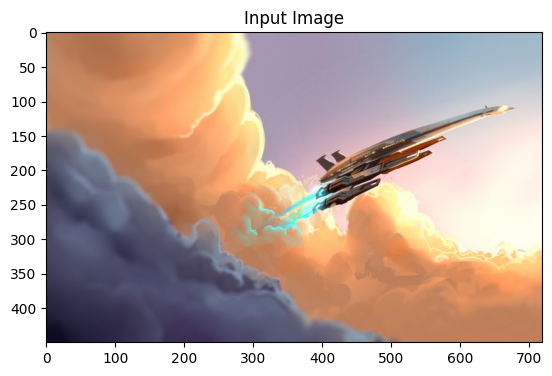

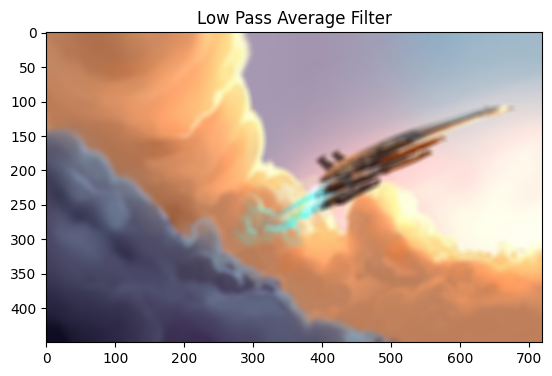

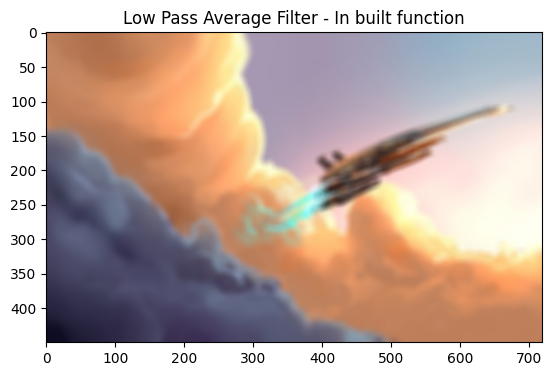

In [6]:
# Blur filter using inbuilt function & filter2D

kernel = np.ones([9, 9], dtype = int)
kernel = kernel / 81 # increasing the denom makes the image darker...9 x 9 = 81 sum(all pix vals in 9x9 grid)/81 = avg pix value

out1 = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

out2 = cv2.blur(src=image, ksize=(11,11))  # 5x5, 7x7, 11x11

plt.imshow(image, 'gray')
plt.title('Input Image')
plt.show()

plt.imshow(out1, 'gray')
plt.title('Low Pass Average Filter')
plt.show()

plt.imshow(out2, 'gray')
plt.title('Low Pass Average Filter - In built function')
plt.show()



##### cv2.blur(source, ksize) <br>

##### param1 = source image <br>

##### param2 = kernel size <br>

The low pass average filter has a 3×3 kernel, consisting of only ones. <br>

Before applying convoltion, ensure that all the values are normalized. <br>

This is done by dividing each element of the kernel, by the number of elements in the kernel, which in this case is 9 <br>

The low pass filter blurs the image by replacing the high intensity pixels with the average intensity value in a given neighbourhood.

## Low Pass Median Filter

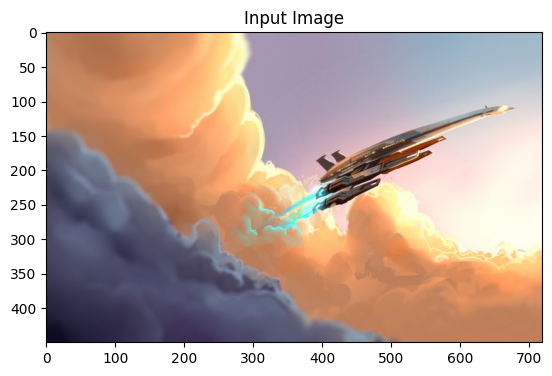

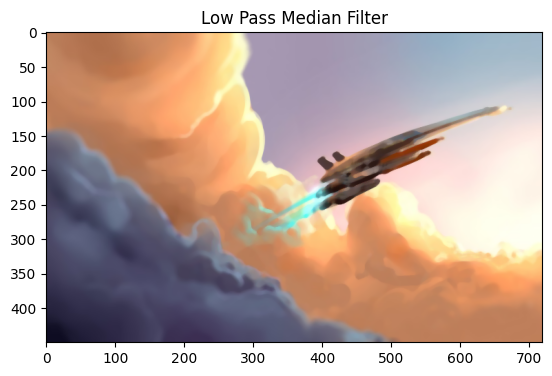

In [4]:
# this puts the median val hence the image looks more like it has been painted (can be used in filters)

out_median_blur = cv2.medianBlur(src=image, ksize = 7)  # 5, 7, 9, 11

plt.imshow(image, 'gray')
plt.title('Input Image')
plt.show()

plt.imshow(out_median_blur, 'gray')
plt.title('Low Pass Median Filter')
plt.show()


## High Pass Filter

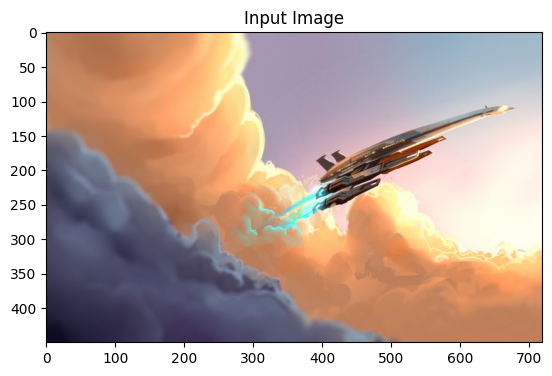

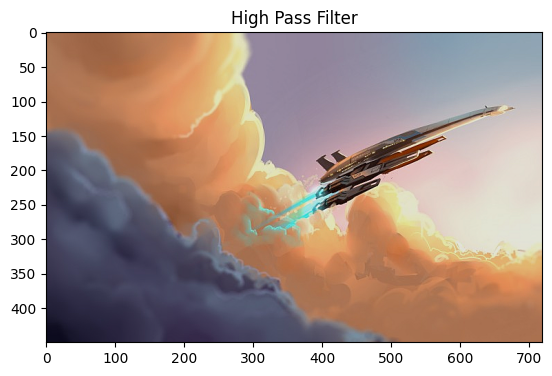

In [19]:
# Useful for outling/identifing the borders

kernel = np.array([[-1/9, -1/9, -1/9],
                   [-1/9, 16/9, -1/9],
                   [-1/9, -1/9, -1/9]])


# another kernal without 1/9
out_median_blur = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

plt.imshow(image, 'gray')
plt.title('Input Image')
plt.show()

plt.imshow(out_median_blur, 'gray')
plt.title('High Pass Filter')
plt.show()


It eliminates low-frequency regions while retaining or enhancing the high-frequency components. <br>

A High Pass Filter is like an edge detector. It gives a high when there is a significant change in the adjacent pixel values.

## High Boost Filter

##### img = cv2.addWeighted(source1, alpha, source2, beta, gamma) <br>

##### where, <br>
##### img = source1 * alpha + source2 * beta + gamma <br>

Logic:

Blur the image by suppressing most of the high-frequency components. <br>

Subtract this smoothed image from the original image(the resulting difference is known as a mask). <br>

Thus, the output image will have most of the high-frequency components that are blocked by the smoothing filter. <br>

Adding this mask back to the original will enhance the high-frequency components. <br>

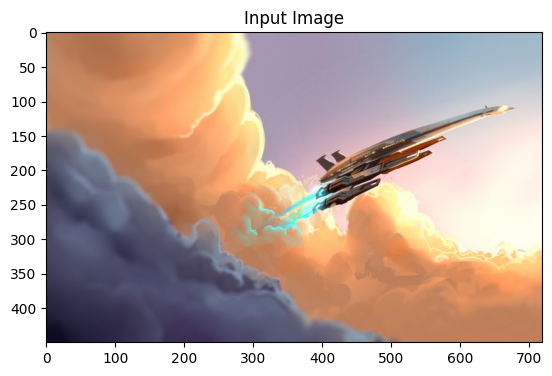

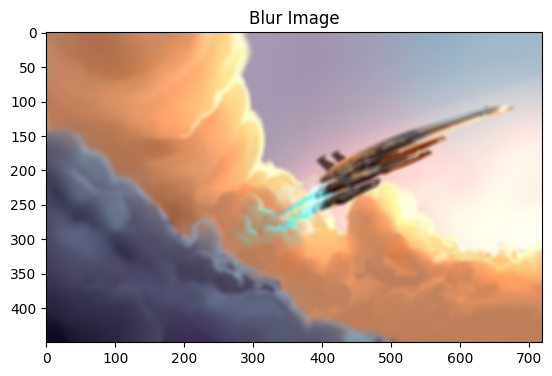

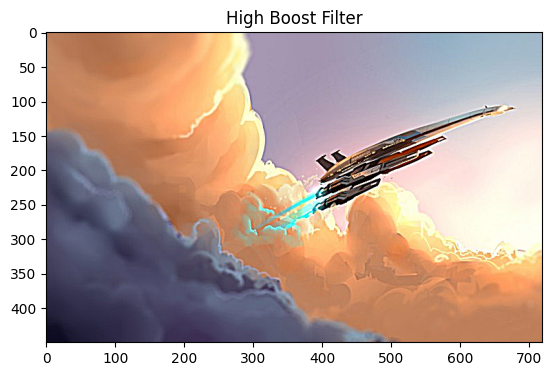

In [21]:
blur_image = cv2.blur(src=image, ksize=(7,7))  # 5x5, 7x7, 11x11

out_median_blur = cv2.addWeighted(image, 3, blur_image, -2, 0)  # edge detection (adjust alpha & beta)



plt.imshow(image, 'gray')
plt.title('Input Image')
plt.show()

plt.imshow(blur_image, 'gray')
plt.title('Blur Image')
plt.show()

plt.imshow(out_median_blur, 'gray')
plt.title('High Boost Filter')
plt.show()


# 1. Add Random noise to the image

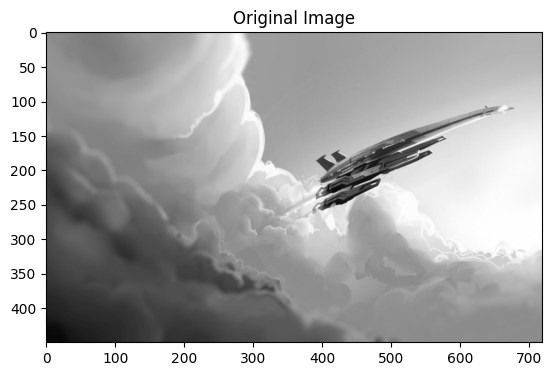

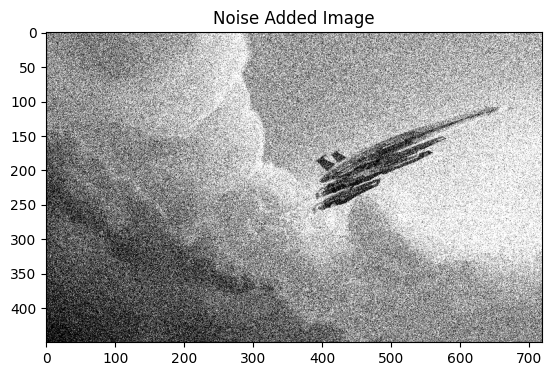

In [7]:
img = cv2.imread(path)

# Convert the image to grayscale
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


plt.imshow(img_gray,'gray')
plt.title('Original Image')
plt.show()


# Genearte noise with same shape as that of the image
# 0 = mean, 50 = std deviation of the noise
noise = np.random.normal(0, 50, img_gray.shape) 

# Add the noise to the image
img_noised = img_gray + noise

# Clip the pixel values to be between 0 and 255.
img_noised = np.clip(img_noised, 0, 255).astype(np.uint8)


plt.imshow(img_noised,'gray')
plt.title('Noise Added Image')
plt.show()

# Now remove noise using LPF, Write your code here

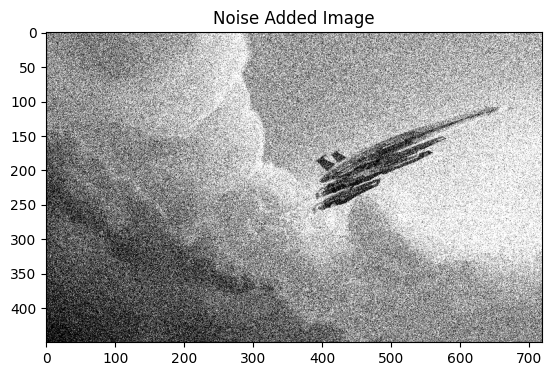

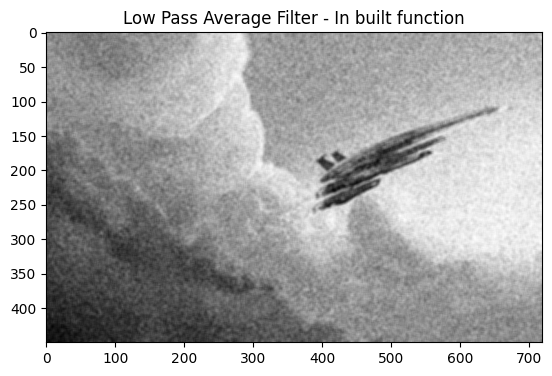

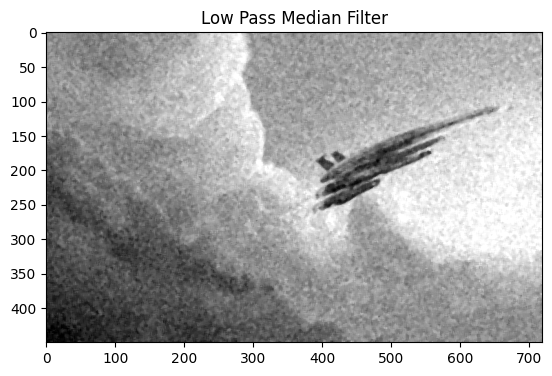

In [8]:
# Blur filter using inbuilt function & filter2D

out_blur = cv2.blur(src=img_noised, ksize=(5,5))  # 5x5, 7x7, 11x11

plt.imshow(img_noised,'gray')
plt.title('Noise Added Image')
plt.show()

plt.imshow(out_blur, 'gray')
plt.title('Low Pass Average Filter - In built function')
plt.show()

# this puts the median val hence the image looks more like it has been painted (can be used in filters)

out_median_blur = cv2.medianBlur(src=img_noised, ksize = 5)  # 5, 7, 9, 11

plt.imshow(out_median_blur, 'gray')
plt.title('Low Pass Median Filter')
plt.show()


# 2. Add Salt and Paper noise

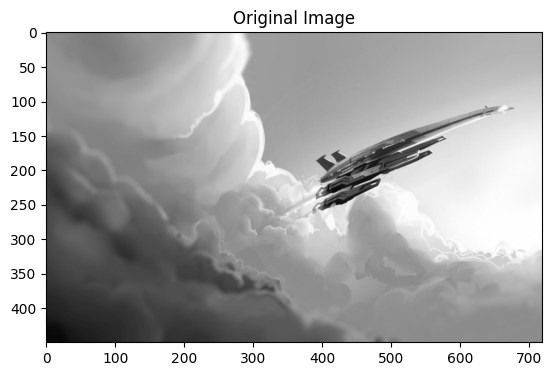

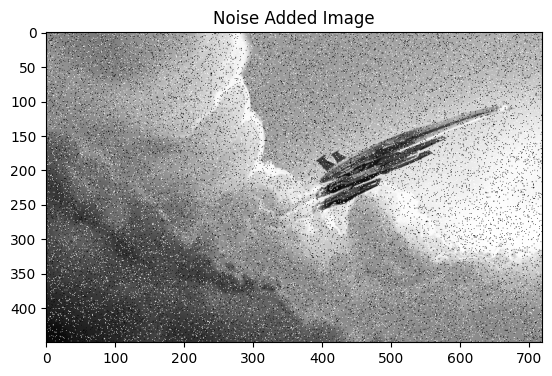

In [9]:
# Read Image
img = cv2.imread(path) # Color image

# Convert the image to grayscale
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


plt.imshow(img_gray,'gray')
plt.title('Original Image')
plt.show()


# Get the image size (number of pixels in the image).
img_size = img_gray.size

# Set the percentage of pixels that should contain noise
noise_percentage = 0.1  # Setting to 10%

# Determine the size of the noise based on the noise precentage
noise_size = int(noise_percentage*img_size)

# Randomly select indices for adding noise.
random_indices = np.random.choice(img_size, noise_size)


# Create a copy of the original image that serves as a template for the noised image.
img_noised = img_gray.copy()

# Create a noise list with random placements of min and max values of the image pixels.
noise = np.random.choice([img_gray.min(), img_gray.max()], noise_size)

# Replace the values of the templated noised image at random indices with the noise, to obtain the final noised image.
img_noised.flat[random_indices] = noise


plt.imshow(img_noised,'gray')
plt.title('Noise Added Image')
plt.show()




# Now remove noise using Median and Mean LPF, Write your code here and compare the results

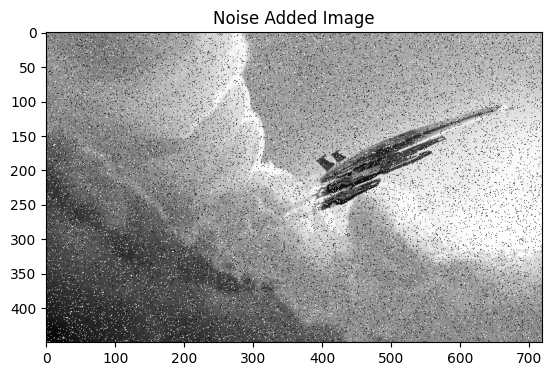

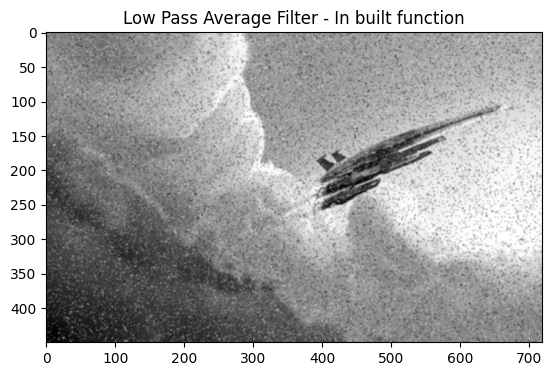

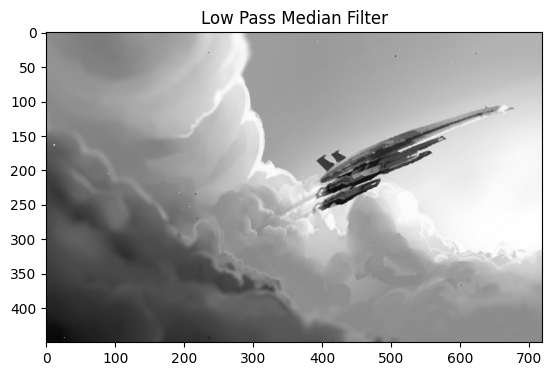

In [10]:
# Blur filter using inbuilt function & filter2D

out_blur = cv2.blur(src=img_noised, ksize=(3,3))  # 5x5, 7x7, 11x11

plt.imshow(img_noised,'gray')
plt.title('Noise Added Image')
plt.show()

plt.imshow(out_blur, 'gray')
plt.title('Low Pass Average Filter - In built function')
plt.show()

# this puts the median val hence the image looks more like it has been painted (can be used in filters)

out_median_blur = cv2.medianBlur(src=img_noised, ksize = 3)  # 5, 7, 9, 11

plt.imshow(out_median_blur, 'gray')
plt.title('Low Pass Median Filter')
plt.show()


# median filter performs much better for salt & paper noise


# Add Gaussian noise to the image

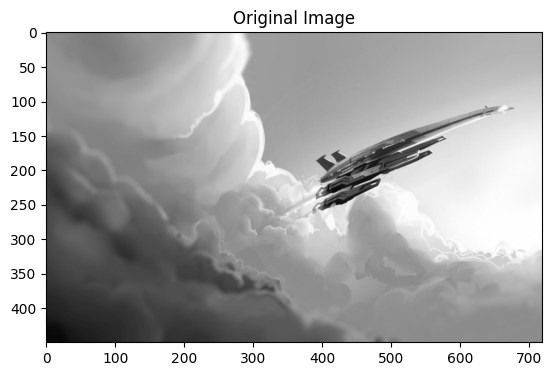

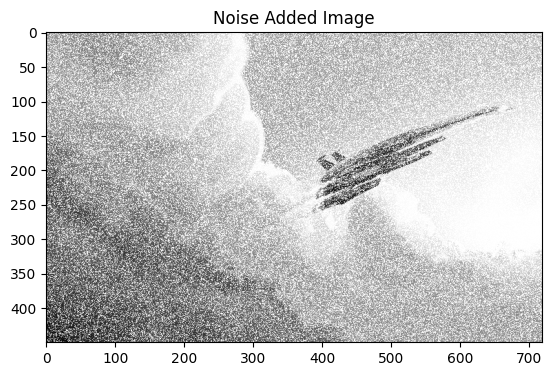

In [18]:
# Load the image
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
x,y = gray.shape[:2]

plt.imshow(gray,'gray')
plt.title('Original Image')
plt.show()


# Generate random Gaussian noise
mean = 0
stddev = 180
noise = np.zeros(gray.shape, np.uint8)
cv2.randn(noise, mean, stddev)

# Add noise to image
noisy_img = cv2.add(gray, noise)

# Save noisy image
plt.imshow(noisy_img,'gray')
plt.title('Noise Added Image')
plt.show()

img_noised = noisy_img


# Now remove noise using LPF, Write your code here

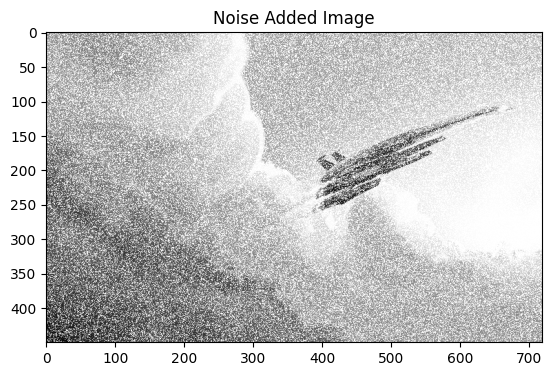

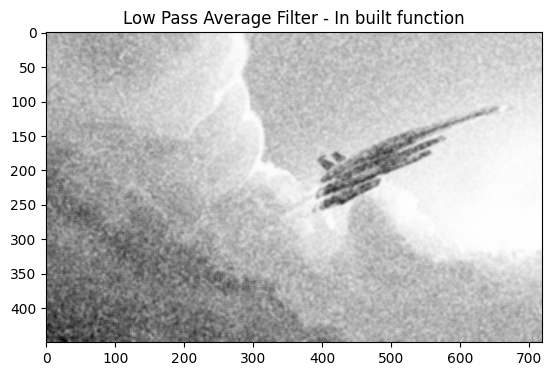

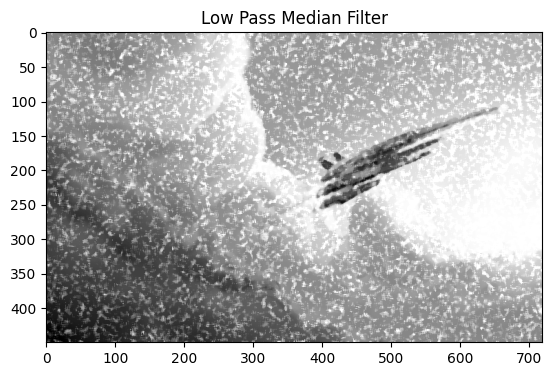

In [21]:
# Blur filter using inbuilt function & filter2D

out_blur = cv2.blur(src=img_noised, ksize=(5,5))  # 5x5, 7x7, 11x11

plt.imshow(img_noised,'gray')
plt.title('Noise Added Image')
plt.show()

plt.imshow(out_blur, 'gray')
plt.title('Low Pass Average Filter - In built function')
plt.show()

# this puts the median val hence the image looks more like it has been painted (can be used in filters)

out_median_blur = cv2.medianBlur(src=img_noised, ksize = 5)  # 5, 7, 9, 11

plt.imshow(out_median_blur, 'gray')
plt.title('Low Pass Median Filter')
plt.show()


# Add impulse noise to the image and use filters to remove it

(245.0, array([[255,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8))


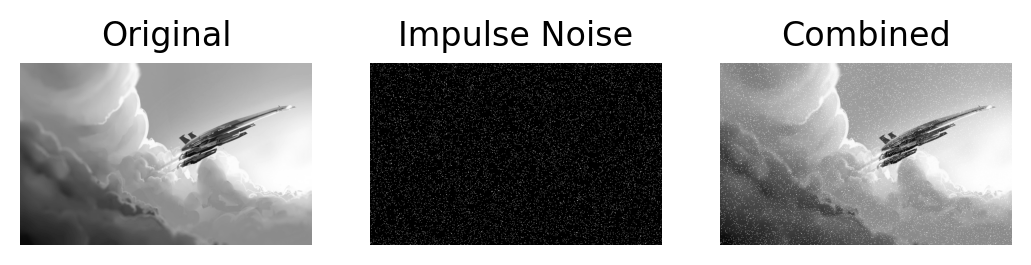

In [14]:
# Load the image
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
x,y = gray.shape

imp_noise=np.zeros((x,y),dtype=np.uint8)
cv2.randu(imp_noise,0,255)
print(cv2.threshold(imp_noise,245,255,cv2.THRESH_BINARY))
imp_noise=cv2.threshold(imp_noise,245,255,cv2.THRESH_BINARY)[1]

in_img=cv2.add(gray,imp_noise)

fig=plt.figure(dpi=200)

fig.add_subplot(1,3,1)
plt.imshow(gray,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(imp_noise,cmap='gray')
plt.axis("off")
plt.title("Impulse Noise")

fig.add_subplot(1,3,3)
plt.imshow(in_img,cmap='gray')
plt.axis("off")
plt.title("Combined")

img_noised = in_img

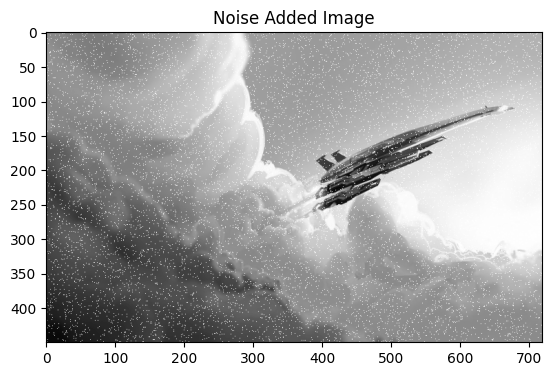

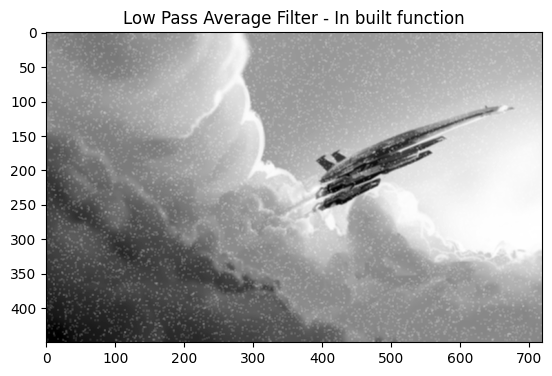

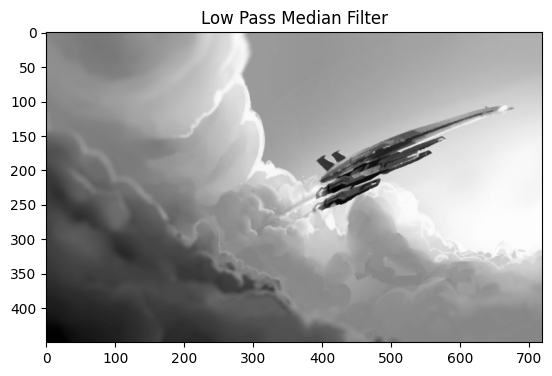

In [28]:
# Blur filter using inbuilt function & filter2D

out_blur = cv2.blur(src=img_noised, ksize=(3,3))  # 5x5, 7x7, 11x11

plt.imshow(img_noised,'gray')
plt.title('Noise Added Image')
plt.show()

plt.imshow(out_blur, 'gray')
plt.title('Low Pass Average Filter - In built function')
plt.show()

# this puts the median val hence the image looks more like it has been painted (can be used in filters)

out_median_blur = cv2.medianBlur(src=img_noised, ksize = 3)  # 5, 7, 9, 11

plt.imshow(out_median_blur, 'gray')
plt.title('Low Pass Median Filter')
plt.show()
